# Imports and Preparation

In [132]:
import math
import matplotlib.pyplot as plt
import os
import pandas as pd
import sys
package_root_dir = os.path.join(os.getcwd(), "..")
sys.path.append(package_root_dir)

from ast import literal_eval

In [133]:
# Load the data.
melondy_df_folder = os.path.join(package_root_dir, "data", "processed")
melondy_df = pd.read_csv(os.path.join(melondy_df_folder, "melondy.csv"))
melondy_df.head()

,artist,album,genre,image_url,rating
0,Integrity,"Howling, for the Nightmare Shall Consume","['hardcore punk', 'heavy metal', 'metal', 'met...",https://d1j3ls2jacen4o.cloudfront.net/thumbnai...,7
1,Big Ups,Two Parts Together,"['indie rock', 'nerdcore', 'punk']",https://d1j3ls2jacen4o.cloudfront.net/thumbnai...,6
2,The Field,Looping State of Mind,"['ambient techno', 'minimal techno', 'shoegaze...",https://d1j3ls2jacen4o.cloudfront.net/thumbnai...,7
3,Mastodon,Once More Round the Sun,"['alternative metal', 'heavy metal', 'progress...",https://d1j3ls2jacen4o.cloudfront.net/thumbnai...,7
4,Various Artists,Dorner vs. Tookie,['hip hop'],https://d1j3ls2jacen4o.cloudfront.net/thumbnai...,7


# Genre Counting

Here, we outline how many genres Anthony has reviewed and what his favorite genres are!

In [134]:
unique_genre_set = set(genre for genre_list in melondy_df["genre"] for genre in literal_eval(genre_list))

In [135]:
print(len(unique_genre_set))
print(sorted(unique_genre_set))

507
['2-step', 'No genres', 'abstract hip hop', 'acid breaks', 'acid house', 'acid jazz', 'acid rock', 'acid techno', 'acidcore', 'acoustic rock', 'afro house', 'afro-jazz', 'afrobeat', 'afrobeats', 'afroswing', 'alternative country', 'alternative dance', 'alternative folk', 'alternative hip hop', 'alternative metal', 'alternative pop', 'alternative punk', 'alternative r&b', 'alternative rock', 'alté', 'ambient', 'ambient americana', 'ambient pop', 'ambient techno', 'americana', 'anarcho-punk', 'anatolian rock', 'anti-folk', 'aor', 'aquacrunk', 'arena rock', 'art pop', 'art punk', 'art rock', 'atmospheric black metal', 'atmospheric sludge metal', 'avant-folk', 'avant-garde', 'avant-garde jazz', 'avant-garde metal', 'avant-garde pop', 'avant-prog', 'ballad', 'ballroom house', 'baltimore club', 'baroque pop', 'beat music', 'bedroom pop', 'berlin school', 'bhangra', 'big band', 'big beat', 'bitpop', "black 'n' roll", 'black metal', 'blackened death metal', 'blackgaze', 'blue-eyed soul', '

In [136]:
f"There are {len(melondy_df["genre"].unique())} unique genre combos out of the {melondy_df.shape[0]} album reviews."

'There are 2097 unique genre combos out of the 3289 album reviews.'

We can see he has reviewed albums from 507 genres. Furthermore, many of his albums have a combination of genre labels. We can see there were 2097 unique genre combinations. However, let's dive deeper to see what the most common genres are!

In [137]:
genre_counts = {}
for genre_list in melondy_df["genre"]:
    for genre in literal_eval(genre_list):
        genre_counts[genre] = genre_counts.get(genre, 0) + 1

In [138]:
genre_counts_df = pd.DataFrame({'count': genre_counts.values()}, index=genre_counts.keys())
genre_counts_df.sort_values(by="count", ascending=False)

,count
rock,1124
hip hop,849
electronic,713
pop,594
indie rock,587
...,...
wonky techno,1
urban cowboy,1
sound art,1
p-funk,1


With all 507 genres in play, it's hard to get a full picture. Let's go old school and create a pie chart.

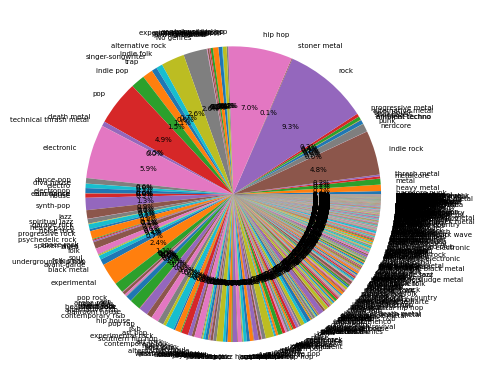

In [139]:
_ = plt.pie(
    genre_counts_df["count"],
    labels=genre_counts_df.index,
    autopct='%1.1f%%',
    # Use 'textprops' to set the font size for labels in a pie chart
    textprops={'fontsize': 5}
)

That's a little gross to look at. Let's look at the top few categories since if a genre is reviewed less than 3 times, it has a review rate of $<0.1\%$. Note that we might have many genres for each entry so some of these percentages are oversaturated since a genre might be lumped in with a bunch of others. Therefore, we have to do a correction on the percentage to make it a percentage of total reviews instead of percentage of genres recorded (which is more than the number of reviews).

In [ ]:
MIN_PERCENTAGE = 2
NUM_REVIEWS = melondy_df.shape[0]
MIN_COUNT = NUM_REVIEWS * MIN_PERCENTAGE / 100
print(f"Album must have been reviewed at least {MIN_COUNT} times to be labeled.")

def autopct_format(pct, min_percentage=MIN_PERCENTAGE):
    corrected_prop = ((pct / 100) * genre_counts_df["count"].sum()) / NUM_REVIEWS
    corrected_pct = corrected_prop * 100 
    return f'{corrected_pct:.1f}%' if corrected_pct >= min_percentage else ''

# have to predefine labels b/c the labels arg doesn't accept an executable
other_mapped_index = [genre if genre_counts_df.loc[genre].item() >= MIN_COUNT else "OTHER" for genre in list(genre_counts_df.index)]
genre_counts_df[genre_counts_df["count"] <= MIN_COUNT].index = "OTHER"
labels = [genre if genre_counts_df.loc[genre].item() >= MIN_COUNT else "OTHER" for genre in list(genre_counts_df.index)]

Album must have been reviewed at least 65.78 times to be labeled.


TypeError: Index(...) must be called with a collection of some kind, 'OTHER' was passed

ValueError: incomplete format

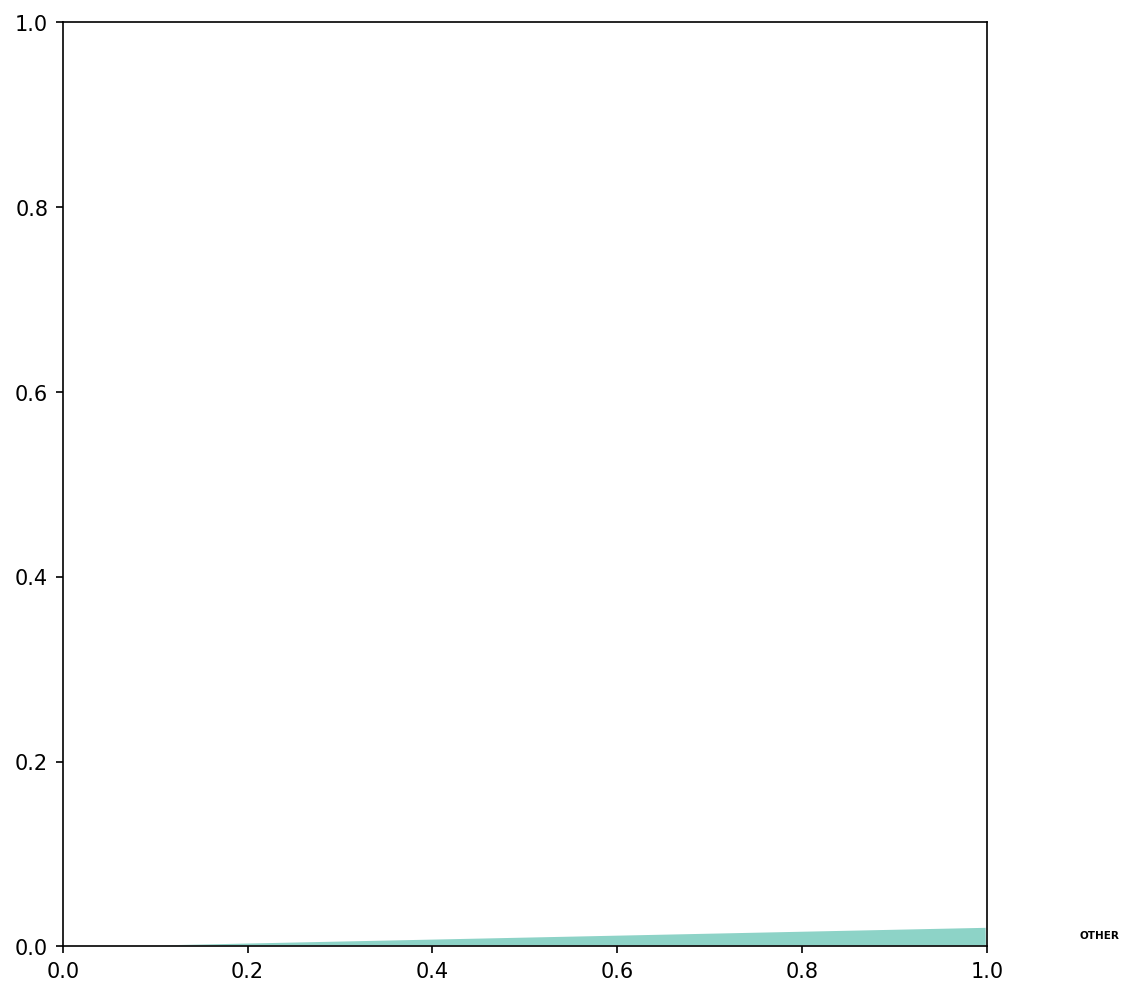

In [ ]:
counts = genre_counts_df["count"]
colors = plt.get_cmap("Set3").colors  

fig, ax = plt.subplots(figsize=(8, 8), dpi=150)

wedges, texts, autotexts = ax.pie(
    counts,
    labels=labels,
    autopct='%1.1f%%', # Display percentage with one decimal place
    colors=colors[:len(counts)],   # limit colors to number of slices
    textprops={'fontsize': 5, 'weight': 'bold', 'color': 'black'},
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)
for autotext in autotexts:
    autotext.set_color("black")
    autotext.set_fontsize(5)
    autotext.set_weight("bold")

ax.set_title(
    "Music Genres in Fantano Reviews",
    fontsize=18,
    weight="bold",
    pad=20
)

plt.tight_layout()
plt.show()

We can see from this only 13 genres (one of which being "No genres") make the cut for being represented 

In [142]:
genre_pct = {}
for pct in range(1, 11):
    genre_pct[pct] = ((genre_counts_df["count"] / NUM_REVIEWS) >= (pct / 100)).sum().item()
genre_pct

{1: 74, 2: 38, 3: 19, 4: 13, 5: 9, 6: 8, 7: 8, 8: 8, 9: 7, 10: 5}